In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

# data

In [2]:
X=pd.read_csv('q1/linearX.csv',header=None)
Y=pd.read_csv('q1/linearY.csv',header=None)

## x,y plot 

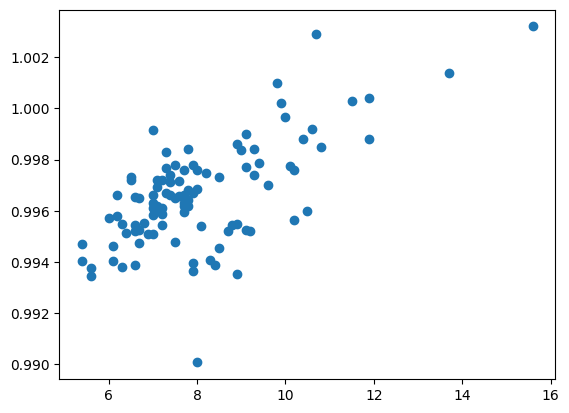

In [3]:
plt.scatter(X,Y)

## normalize the data

In [4]:
X=X-np.mean(X)
X/=np.var(X)

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [5]:
X=X.to_numpy()
X=np.hstack((np.ones_like(X),X))
X.shape

(100, 2)

In [6]:
Y=Y.to_numpy()

In [7]:
pd.DataFrame(X).head()

,0,1
0,1.0,0.349594
1,1.0,-0.020881
2,1.0,0.349594
3,1.0,0.113837
4,1.0,-0.391357


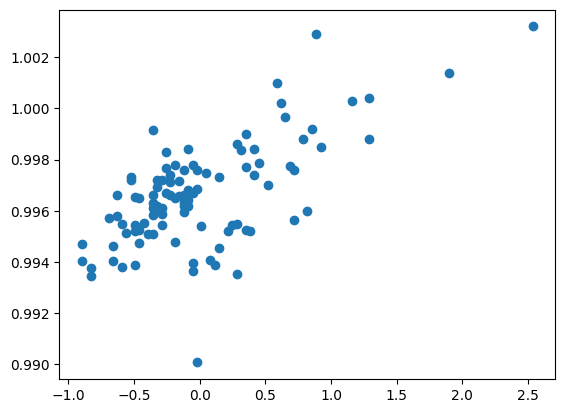

In [8]:
plt.scatter(X[:,1],Y)

## training

In [9]:
theta=np.zeros((1,2))
def hypothesis(X,theta):
    return np.dot(X,theta.T)
def Jtheta(y,X,theta):
    yhat=hypothesis(X,theta).reshape(-1,1)
    return (0.5*np.dot((y-yhat).T,(y-yhat))/yhat.shape[0]).flatten()


J(θ) = (1/
2m)
m∑
i=1
(y(i) −hθ(x(i)))^2

In [10]:
alpha=0.0001
itr=0
_3d_pt=[]
while itr<20000:
    theta=theta+alpha*np.dot((Y-hypothesis(X,theta)).T,X)
    _3d_pt.append((theta[:,0][0],theta[: ,1][0],Jtheta(Y,X,theta)[0]))
    itr+=1
theta
    

array([[0.9966201 , 0.00230932]])

In [11]:
points=np.array(_3d_pt)


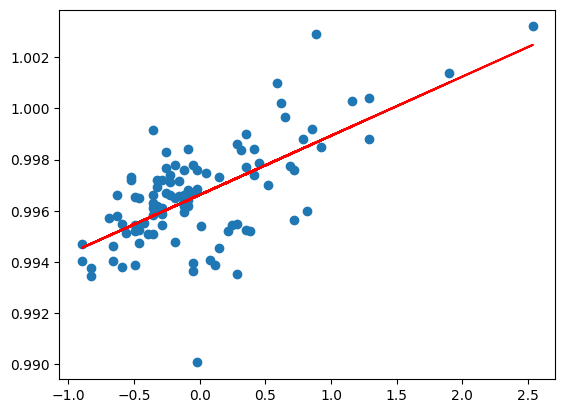

In [12]:
plt.scatter(X[:,1].flatten(),Y.flatten())
plt.plot(X[:,1].flatten(),hypothesis(X,theta).flatten(),color="red")

# plt 3d

In [30]:
theta0,theta1=np.linspace(0,2,50),np.linspace(-1,1,50)
theta0,theta1=np.meshgrid(theta0,theta1)

new_thetas=np.array([[theta0[i][j],theta1[i][j]] for i in range(len(theta0)) for j in range(len(theta1))])



In [31]:
z=[Jtheta(Y,X,t)[0] for t in new_thetas]

In [32]:
z=np.array(z).reshape(len(theta0),-1)
plt.ion()

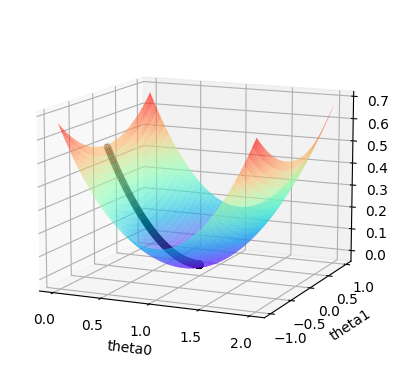

In [34]:

ax=plt.axes(projection='3d')
ax.plot_surface(theta0,theta1,z,cmap='rainbow',alpha=0.6)
ax.scatter(points[:,0],points[:,1],points[:,2],color='black')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('z')
ax.view_init(12,-66)
plt.show()



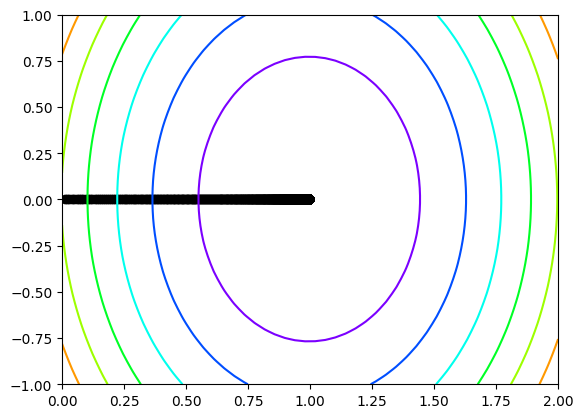

In [38]:
plt.contour(theta0,theta1,z, cmap='gist_rainbow_r')
plt.scatter(points[:,0],points[:,1],color='black')